In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
import utils.genprodUtils as gen
from utils.genprodUtils.generators import Generator


In [264]:


# gen_info = dict(
#     pt=lambda n : np.zeros(n),
#     eta=lambda n : np.zeros(n),
#     phi=lambda n : np.zeros(n),
#     e=lambda n : np.ones(n) * 1000,
# )

gen_event = Generator(gen_info)

In [265]:
N = 10000
tree = gen_event(N)

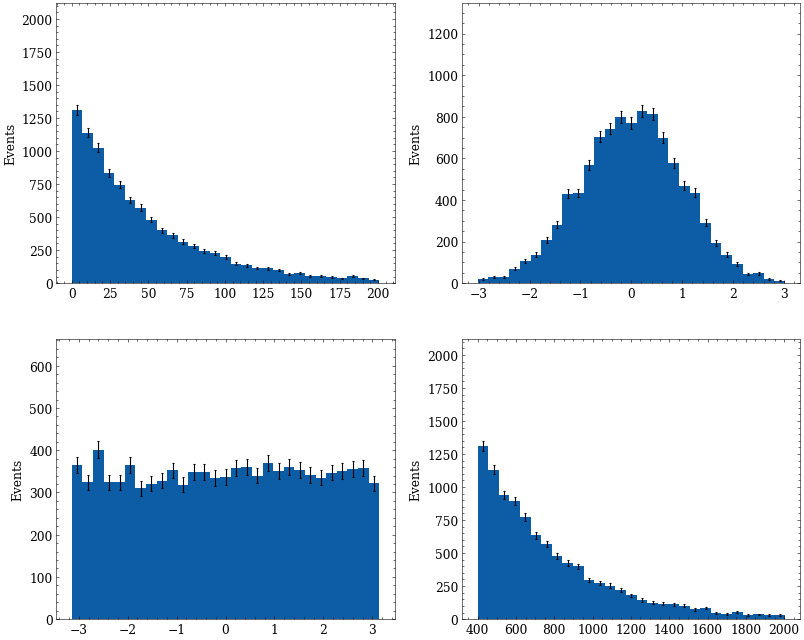

In [266]:
fig, axs = study.get_figax(4)

for i, var in enumerate(gen_info.keys()):
    histo_array(tree.event[var], figax=(fig, axs.flat[i]))

In [268]:
m1 = 172
m2 = 125
m3 = 172

valid = tree.event.mass > (m1 + m2 + m3)
tree = tree[valid]
np.mean(valid)

0.8406

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 <utils.plotUtils.histogram.Histo at 0x7f30f3f65400>)

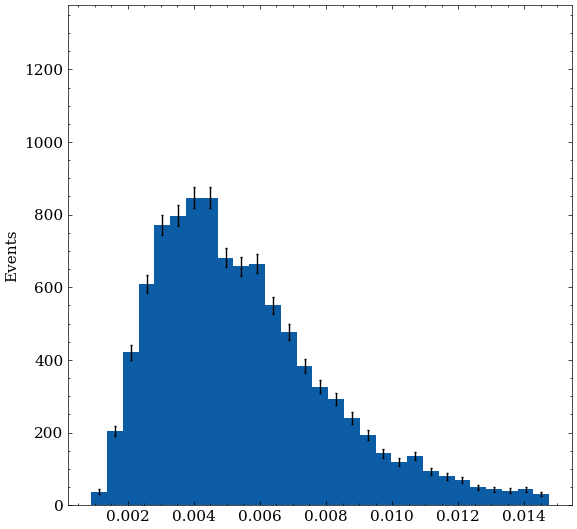

In [292]:
histo_array(np.random.lognormal(np.log(5e-3), 0.5, size=N))

In [271]:
wm = 81
b = 5

t1_w, t1_b   = two_body_decay(t1, wm, b)
h1_b1, h1_b2 = two_body_decay(h1, wm, b)
t2_w, t2_b   = two_body_decay(t2, wm, b)

In [273]:
t1_w_u, t1_w_d = two_body_decay(t1_w, 2e-3, 5e-3)
t2_w_u, t2_w_d = two_body_decay(t2_w, 2e-3, 5e-3)

In [280]:
genparts = gen.hadronization(quarks, 20)

Hadronization: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]


In [282]:
jets = gen.cluster_jets(genparts)

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 <utils.plotUtils.histogram.Histo at 0x7f30f88d5e20>)

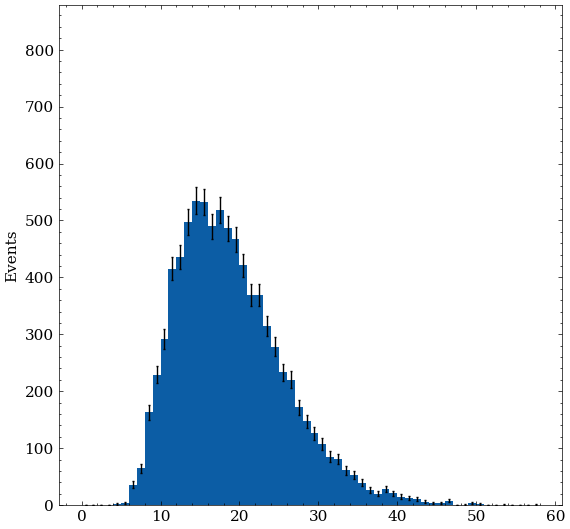

In [285]:
histo_array(ak.num(jets, axis=1))

In [286]:
presel_jets = (jets.pt > 20) & (abs(jets.eta) < 2.5)
jets = jets[presel_jets]

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 <utils.plotUtils.histogram.Histo at 0x7f30f866eb20>)

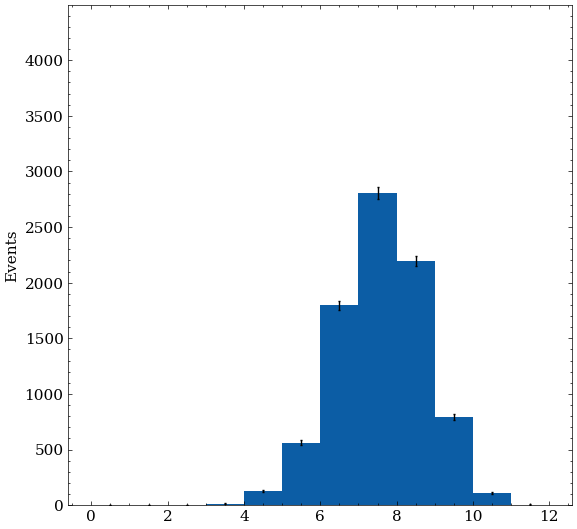

In [287]:
histo_array(ak.num(jets, axis=1))

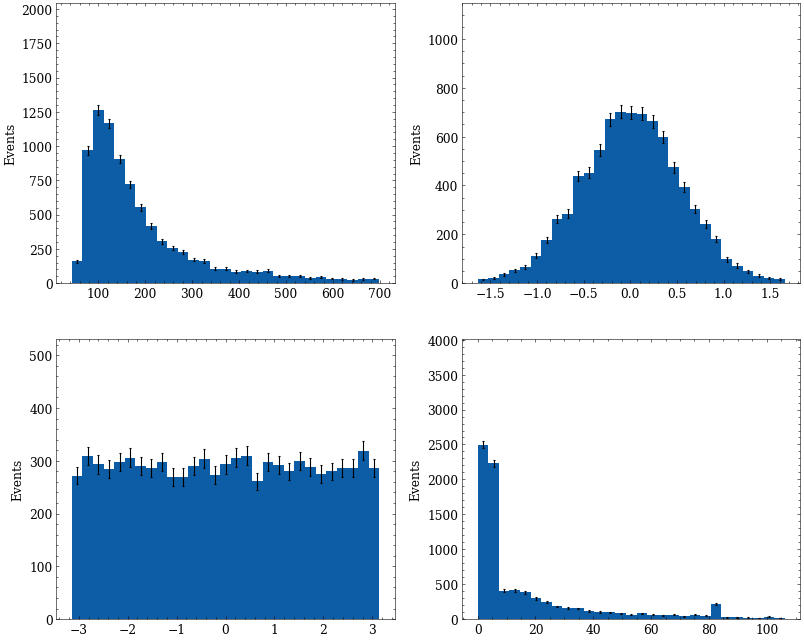

In [288]:
fig, axs = study.get_figax(4)

for i, var in enumerate(gen_info.keys()):
    histo_array(jets[var][:,0], figax=(fig, axs.flat[i]))

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 [HistoList<[<utils.plotUtils.histogram.Histo object at 0x7f30fab991f0>, <utils.plotUtils.histogram.Histo object at 0x7f30fab99760>, <utils.plotUtils.histogram.Histo object at 0x7f30faae7bb0>]>])

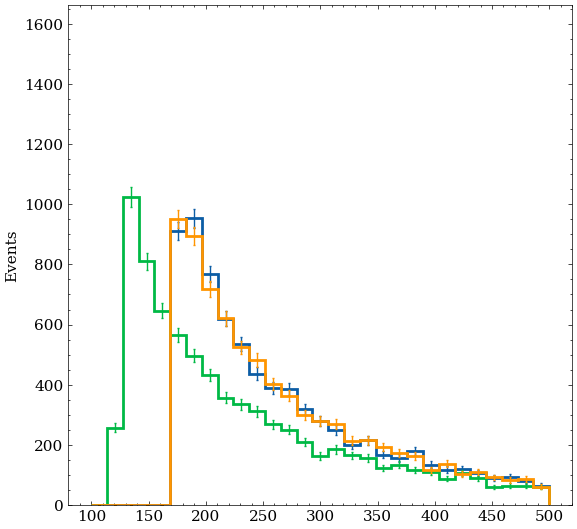

In [270]:
hist_multi([t1.e, h1.e, t2.e], bins=(100,500,30))